In [16]:
import tweepy
import json

In [17]:
# Store OAuth authentication credentials in relevant variables
access_token = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"
access_token_secret = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"
consumer_key = "xxxxxxxxxxxxxxxxxxxx1"
consumer_secret = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"

In [18]:
# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)

In [19]:
class MyStreamListener(tweepy.StreamListener):
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open("tweets.txt", "w")

    def on_status(self, status):
        tweet = status._json
        self.file.write( json.dumps(tweet) + '\n' )
        self.num_tweets += 1
        if self.num_tweets < 10000:
            return True
        else:
            return False
        self.file.close()

    def on_error(self, status):
        print(status)

In [20]:
# Initialize Stream listener
l = MyStreamListener()

# Create you Stream object with authentication
stream = tweepy.Stream(auth, l)


# Filter Twitter Streams to capture data by the keywords:
stream.filter(track = ['obama', 'trump', 'putin', 'modi'])

In [1]:
import json

# String of path to file: tweets_data_path
tweets_data_path = 'tweets.txt'

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys())

dict_keys(['created_at', 'id', 'id_str', 'text', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted', 'possibly_sensitive', 'filter_level', 'lang', 'timestamp_ms'])


In [2]:
# Import package
import pandas as pd

# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data , columns= ['text', 'lang'])
df2 = pd.DataFrame(tweets_data , columns= ['user'])




# Print head of DataFrame
print(df.head())



                                                text lang
0  RT @kylegriffin1: The Chinese government is ba...   en
1  @realDonaldTrump The only person committing il...   en
2  @krassenstein investigators are looking into b...   en
3  RT @EdKrassen: Perhaps the GOP isn't covering ...   en
4  RT @krassenstein: Mark This Tweet.  We will ha...   en


In [3]:
location=[]
for i in range(len(df2)):
         location.append(df2['user'][i]["location"])
df["location"] = location

print(df.head())
print(df.tail())

                                                text lang       location
0  RT @kylegriffin1: The Chinese government is ba...   en           None
1  @realDonaldTrump The only person committing il...   en           None
2  @krassenstein investigators are looking into b...   en  United States
3  RT @EdKrassen: Perhaps the GOP isn't covering ...   en   Puyallup, WA
4  RT @krassenstein: Mark This Tweet.  We will ha...   en           None
                                                   text lang  \
9507  RT @LionelMedia: The problem with papers like ...   en   
9508  Trump’s instincts were right about this creatu...   en   
9509  Modi's Kashmir Policy Is Playing Right Into th...   en   
9510  I Guarantee,,, that Owner,,&amp; Coach Saying ...   en   
9511  RT @RVAwonk: I really DGAF what Trump says and...   en   

                 location  
9507           Austin, TX  
9508                 None  
9509  Geneva, Switzerland  
9510  North Carolina, USA  
9511                 None  


In [4]:
import re

def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False



In [5]:
[obama1, trump1 , putin1 , modi1 ]  = [0,0,0,0]
names = []
for index, row in df.iterrows():
    
    if word_in_text('obama', row['text']):
        names.append("obama")
        obama1 +=1 
    elif word_in_text('putin', row['text']):
        names.append('putin')
        putin1 +=1
    elif word_in_text('modi', row['text']):
        names.append('modi')
        modi1 +=1
    elif word_in_text('trump', row['text']):
        names.append('trump')
        trump1 +=1
    else :
        names.append('None')

df["names"] = names
print(df.head())

print([obama1, trump1 , putin1 , modi1 ])

                                                text lang       location  \
0  RT @kylegriffin1: The Chinese government is ba...   en           None   
1  @realDonaldTrump The only person committing il...   en           None   
2  @krassenstein investigators are looking into b...   en  United States   
3  RT @EdKrassen: Perhaps the GOP isn't covering ...   en   Puyallup, WA   
4  RT @krassenstein: Mark This Tweet.  We will ha...   en           None   

   names  
0  trump  
1  trump  
2   None  
3  trump  
4  trump  
[1040, 4401, 1092, 43]


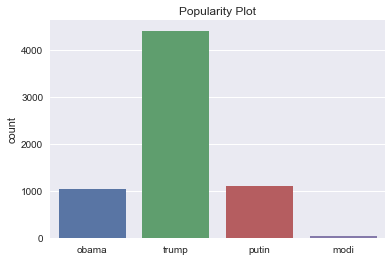

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['obama', 'trump', 'putin', 'modi']

# Plot histogram
ax = sns.barplot(cd,[obama1, trump1, putin1, modi1])
ax.set(ylabel="count")
plt.title("Popularity Plot")
plt.show()

In [7]:
from textblob import TextBlob

df1=df

def strip_non_ascii(string):
    ''' Returns the string without non ASCII characters'''
    stripped = (c for c in string if 0 < ord(c) < 127)
    return ''.join(stripped)

In [8]:
for index, row in df1.iterrows():
       row[0]=row[0].lower()
       row[0] = strip_non_ascii(row[0])
       row[0] = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', row[0])

In [9]:
polarity=[]
for index, row in df1.iterrows():     
        polarity.append(float(TextBlob(row[0]).sentiment.polarity))
df1['polarity'] = polarity        



In [10]:
#Subsetting the data frame for the indivisuals
dfobama=df1[df1["names"]== "obama"]
dftrump=df1[df1["names"]== "trump"]
dfputin=df1[df1["names"]== "putin"]
dfmodi=df1[df1["names"]== "modi"]



In [11]:
# Taking Mean of all Polarities
obama_pol=dfobama["polarity"].mean()
trump_pol=dftrump["polarity"].mean()
putin_pol=dfputin["polarity"].mean()
modi_pol= dfmodi["polarity"].mean()

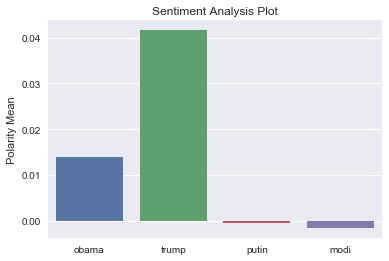

In [12]:
# Creating Polarity plot
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['obama', 'trump', 'putin', 'modi']

# Plot histogram
ax = sns.barplot(cd,[obama_pol, trump_pol, putin_pol, modi_pol])
ax.set(ylabel="Polarity Mean")
plt.title("Sentiment Analysis Plot")
plt.show()

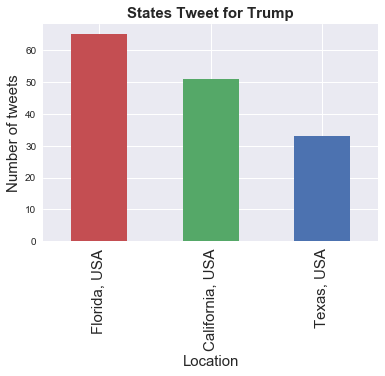

In [60]:
tweets_by_location = dftrump['location'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Location', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('States Tweet for Trump', fontsize=15, fontweight='bold')
my_colors = 'rgbky'
tweets_by_location[2:5].plot(ax=ax, kind='bar', color= my_colors)
plt.show()

,text,lang,location,names,polarity
0,rt @kylegriffin1: the chinese government is ba...,en,None,trump,0.000000
1,@realdonaldtrump the only person committing il...,en,None,trump,-0.541667
2,@krassenstein investigators are looking into b...,en,United States,None,0.000000
3,rt @edkrassen: perhaps the gop isn't covering ...,en,"Puyallup, WA",trump,0.000000
4,rt @krassenstein: mark this tweet. we will ha...,en,None,trump,0.400000


In [63]:
states = ['Florida, USA','California, USA','Texas, USA','United States']
df3= dftrump[dftrump.location.isin(states)]

In [64]:
print(df3)

                                                   text lang         location  \
17    rt @krassenstein: there is a reason why the ma...   en    United States   
55    rt @edkrassen: perhaps the gop isn't covering ...   en    United States   
76    rt @repadamschiff: trump is choosing to promot...   en    United States   
92    rt @ezralevin: trump got you angry? despondent...   en  California, USA   
111   @kathygriffin and the funny thing is... you wo...   en       Texas, USA   
159   rt @mitchellvii: if trump doesn't want to #mag...   en  California, USA   
164   rt @kwilli1046: i've never seen a president go...   en     Florida, USA   
233   rt @deplorablem1ke: liberals keep screaming tr...   en    United States   
240   rt @johncardillo: yes, hillary won the popular...   en       Texas, USA   
244   rt @donaldjtrumpjr: nothing is shocking anymor...   en    United States   
254   andrs manuel lpez obrador le propuso a donald ...   es    United States   
308   rt @paulkrugman: i've 

In [81]:
df4 = pd.DataFrame(df3.groupby(['location'])['polarity'].mean())

In [82]:
df4.head()

,polarity
location,
"California, USA",0.028215
"Florida, USA",0.040421
"Texas, USA",0.111561
United States,0.056779


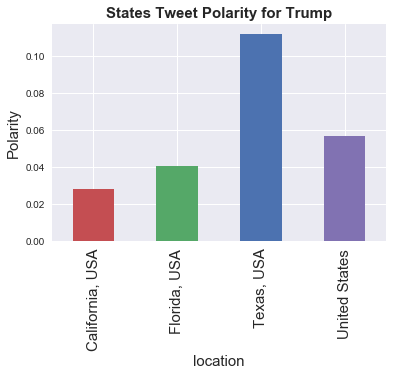

In [83]:
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Location', fontsize=15)
ax.set_ylabel('Polarity' , fontsize=15)
ax.set_title('States Tweet Polarity for Trump', fontsize=15, fontweight='bold')
my_colors = 'rgbmc'
df4.plot(ax=ax, kind='bar', color= my_colors,legend = None)
plt.show()

In [87]:
states = ['California, USA','Florida, USA','Texas, USA','United States']
voting_Percentages = [31.62,49.02,52.23,46.1]
df5 = pd.DataFrame(voting_Percentages,states)

In [88]:
print(df5)

                     0
California, USA  31.62
Florida, USA     49.02
Texas, USA       52.23
United States    46.10


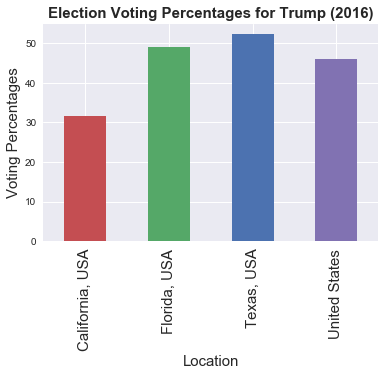

In [97]:
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Location', fontsize=15)
ax.set_ylabel('Voting Percentages' , fontsize=15)
ax.set_title('Election Voting Percentages for Trump (2016)', fontsize=15, fontweight='bold')
my_colors = 'rgbmc'
df5.plot(ax=ax, kind='bar', color= my_colors,legend = None)
plt.show()